In [1]:
import cv2
import numpy as np
import pywt
import math
import matplotlib.pyplot as plt


def hardThreshold(value, threshold):
    if abs(value) < threshold:
        return 0
    else:
        return value


def softThreshold(value, threshold):
    if abs(value) < threshold:
        return 0
    else:
        if value<0:
            return value+threshold
        else:
            return value-threshold

def cDxTHreshole(cDx, threshold,method):
    if method == 'hard':
        print('hard')
    elif method=='soft':
        print('soft')
    for i in range(len(cDx)):
        for x in range(cDx[i].shape[0]):
            for y in range(cDx[i].shape[1]):
                if method=='hard':
                    cDx[i][x][y] = hardThreshold(cDx[i][x][y], threshold)
                elif method=='soft':
                    cDx[i][x][y] = softThreshold(cDx[i][x][y], threshold)


In [2]:
mean = 0
var = 20
rawImage = cv2.imread("img.jpg", 0)
gaussianNoise = np.random.normal(mean, var, rawImage.shape)
img = rawImage+gaussianNoise

In [24]:
print(pywt.wavelist('rbio'))


['rbio1.1', 'rbio1.3', 'rbio1.5', 'rbio2.2', 'rbio2.4', 'rbio2.6', 'rbio2.8', 'rbio3.1', 'rbio3.3', 'rbio3.5', 'rbio3.7', 'rbio3.9', 'rbio4.4', 'rbio5.5', 'rbio6.8']


In [29]:
wavelet = 'rbio3.3'
method = 'hard'
levels = 3 if int(math.floor(math.log2(img.shape[0]))) > 3 else int(math.floor(math.log2(img.shape[0])))
print(levels)
CA = pywt.wavedec2(img, wavelet, level=levels)


3


In [26]:
# minimaxi
if img.size<32:
    threshold=0
else:
    threshold=0.3936+0.1829*(math.log(img.size)/math.log(2))
threshold


4.164228878085402

In [22]:
# rigrsure
crit=math.sqrt((math.log(img.size)/math.log(2))**3/img.size)

eta=0
for i in CA[1:]:
    for j in i:
        for k in j:
            for p in k:
                eta += p*p-img.size
eta/=img.size
if eta<crit:
    threshold = var*math.sqrt(2*math.log2(img.size))
else:
    threshold = min(eta, crit)
threshold


128.4236577897127

In [30]:
threshold = var*math.sqrt(2*math.log2(img.size))

128.4236577897127
hard
hard


True

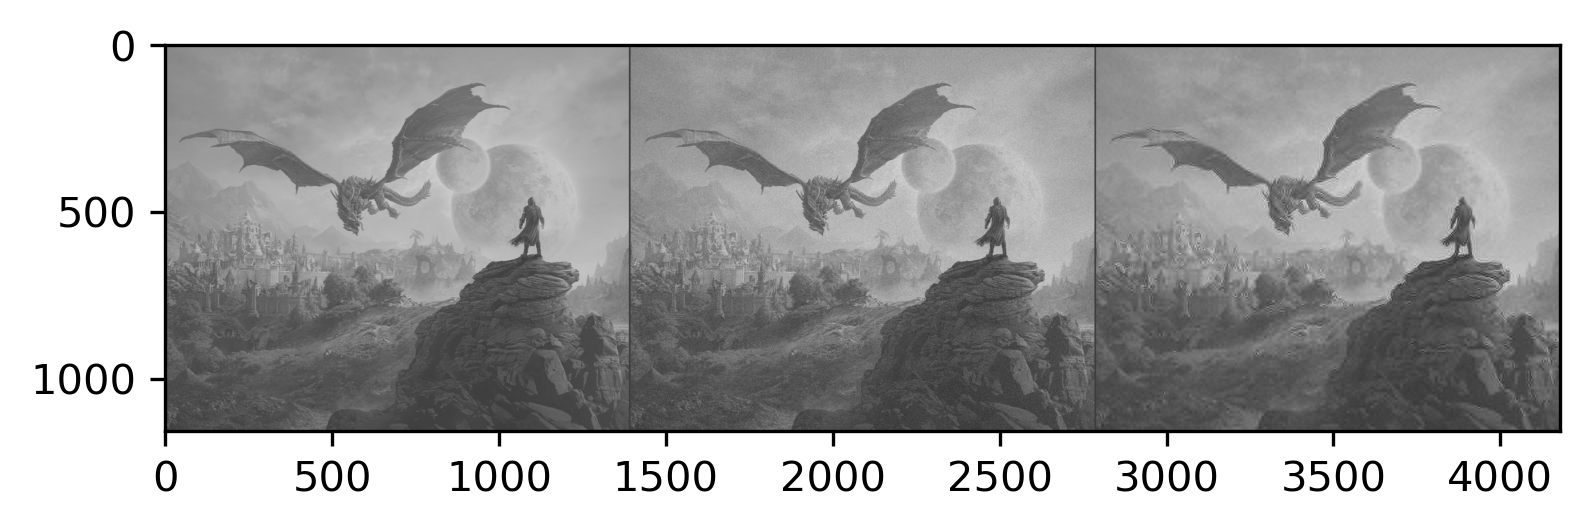

In [31]:
print(threshold)
maxLevel=2
for i in range(1, len(CA)):
    if i > maxLevel:
        break
    cDxTHreshole(CA[i], threshold, method)

rImg = pywt.waverec2(CA, wavelet)
line = np.zeros((img.shape[0], 5))
result = np.hstack((rawImage, line, img, line, rImg))
plt.figure(dpi=300)
plt.imshow(result, cmap=plt.cm.gray)
cv2.imwrite('imgout_certain_{}_{}_{}-{}.jpg'.format(wavelet, method, maxLevel, levels), result)
